<a href="https://colab.research.google.com/github/lhoegler16/Biersortenerkennung/blob/main/Biersortenerkennung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Biersortenerkennung

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U fastai
from fastai.vision.all import*

     |████████████████████████████████| 194kB 8.0MB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
     |████████████████████████████████| 12.8MB 247kB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [6]:
#download from qdrive

!cp drive/MyDrive/Biersortenerkenner/Biersortenerkenner.tar.gz ./
!mkdir /content/images
!tar -xf /content/Biersortenerkenner.tar.gz -C /content/images/

In [7]:
path = Path('images')
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);

In [11]:
beers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
beer_dataloader = beers.dataloaders(path)

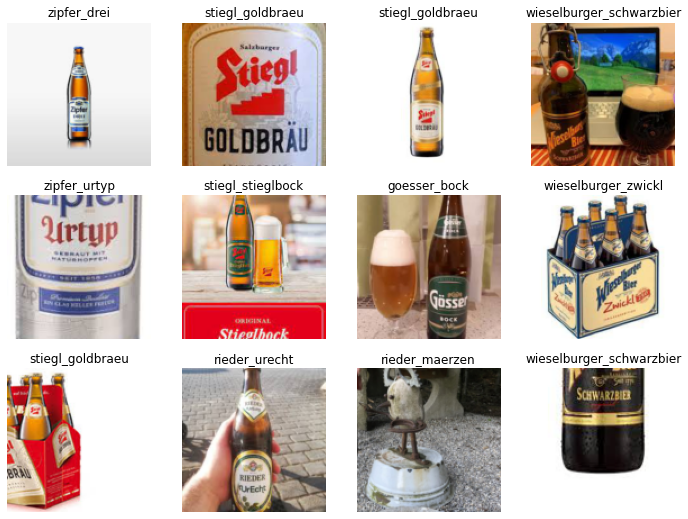

In [24]:
beer_dataloader.show_batch(max_n = 12, nrows= 3)

In [17]:
learner = cnn_learner(beer_dataloader,resnet18,metrics=error_rate)

In [25]:
learner.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.032017,3.317032,0.481013,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.002591,3.259333,0.481013,00:01
1,0.001518,3.231648,0.506329,00:01
2,0.001269,3.237002,0.493671,00:01
3,0.000941,3.291393,0.493671,00:01
4,0.001690,3.342781,0.506329,00:01


In [26]:
learn.export('biersorten_classifier.pkl')

In [28]:
#copy learner on gdrive
!cp /content/biersorten_classifier.pkl /content/drive/MyDrive/Biersortenerkenner/biersorten_classifier.pkl

In [ ]:
#copy exported learner from gdrive

!cp drive/MyDrive/Biersortenerkenner/biersorten_classifier.pkl ./

In [ ]:
learner = load_learner(path/'saab_bier_classifier.pkl')

In [ ]:
learner.predict('Bilddatei eingeben')